<b>Hier begint real-deal sprint 1 notebook:<b>

# Sprint 1: Data analysis and supervised learning

We start by importing our required libraries and loading our dataset into a pandas dataframe:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data=pd.read_csv("data/complaints-2020-01-22_08_24.csv")
data.head(1)
# data.describe(include='all') #anders enkel numerieke waarden statistieken

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,07/23/19,"Credit reporting, credit repair services, or o...",Credit reporting,Credit monitoring or identity theft protection...,Problem canceling credit monitoring or identif...,I have complained many times that the credit r...,Company has responded to the consumer and the ...,Experian Information Solutions Inc.,CA,926XX,None,Consent provided,Web,07/23/19,Closed with explanation,Yes,NaN,3315279


From the dataset, we can extract the following columns with the type of data it contains:

In [2]:
data_features = data.dtypes
data_features

Date received                   object
Product                         object
Sub-product                     object
Issue                           object
Sub-issue                       object
Consumer complaint narrative    object
Company public response         object
Company                         object
State                           object
ZIP code                        object
Tags                            object
Consumer consent provided?      object
Submitted via                   object
Date sent to company            object
Company response to consumer    object
Timely response?                object
Consumer disputed?              object
Complaint ID                     int64
dtype: object

We start by transforming al the empty fields to the same value so we change all NaN of consumer disputed to None:

In [3]:
data["Consumer disputed?"].fillna("None")

0         None
1         None
2         None
3         None
4         None
5         None
6         None
7         None
8         None
9         None
10        None
11        None
12        None
13        None
14        None
15        None
16        None
17        None
18        None
19        None
20        None
21        None
22        None
23        None
24        None
25        None
26        None
27        None
28        None
29        None
          ... 
485671    None
485672    None
485673    None
485674    None
485675    None
485676    None
485677    None
485678    None
485679    None
485680    None
485681      No
485682      No
485683      No
485684      No
485685      No
485686     Yes
485687      No
485688      No
485689      No
485690      No
485691      No
485692      No
485693      No
485694      No
485695      No
485696      No
485697      No
485698      No
485699      No
485700      No
Name: Consumer disputed?, Length: 485701, dtype: object

To make the processing faster, we change all categorical data to numerical values and add them to the dataframe:

In [4]:
data["num_Product"] = data["Product"].astype("category").cat.codes
data["num_Sub-product"] = data["Sub-product"].astype("category").cat.codes
data["num_Issue"] = data["Issue"].astype("category").cat.codes
data["num_Sub-issue"] = data["Sub-issue"].astype("category").cat.codes
data["num_Company"] = data["Company"].astype("category").cat.codes
data["num_State"] = data["State"].astype("category").cat.codes
data["num_Submitted via"] = data["Submitted via"].astype("category").cat.codes
data["num_Company response to consumer"] = data["Company response to consumer"].astype("category").cat.codes
data["Product_issue"] = data["Product"] + "_" + data["Issue"]
data["num_Product_Issue"] = data["Product_issue"].astype("category").cat.codes
data.head(2)

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,...,num_Product,num_Sub-product,num_Issue,num_Sub-issue,num_Company,num_State,num_Submitted via,num_Company response to consumer,Product_issue,num_Product_Issue
0,07/23/19,"Credit reporting, credit repair services, or o...",Credit reporting,Credit monitoring or identity theft protection...,Problem canceling credit monitoring or identif...,I have complained many times that the credit r...,Company has responded to the consumer and the ...,Experian Information Solutions Inc.,CA,926XX,...,6,15,45,127,1488,8,0,1,"Credit reporting, credit repair services, or o...",90
1,07/26/19,Debt collection,I do not know,False statements or representation,Attempted to collect wrong amount,please review the current fraud account and al...,Company believes it acted appropriately as aut...,"Ideal Collection Services, Inc.",FL,333XX,...,7,33,56,9,2052,13,0,1,Debt collection_False statements or representa...,117


<b>Vanaf hier alles dat nog niet officieel in de notebook zit<b>

# Plots

This is the distribution of the categories of products.

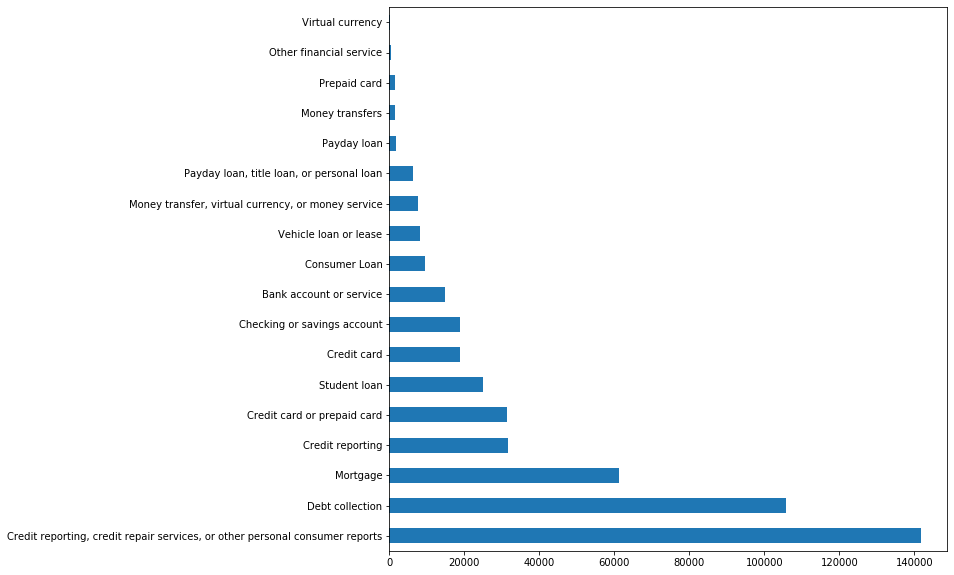

In [5]:
#duplicaten vinden
#data[data.duplicated()] #er zijn er geen over alle kolommen bekeken

#data[data.duplicated(["ZIP code","Product"])]

plt.figure(figsize=(10,10))
data["Product"].value_counts().plot(kind="barh")


Virtual currency en money transfers => money transfer,virtual...
payday loan => payday loan, title loan...
prepaid card en credit card => prepaid and credit
credit reporting => credit reporting, credit repair services...


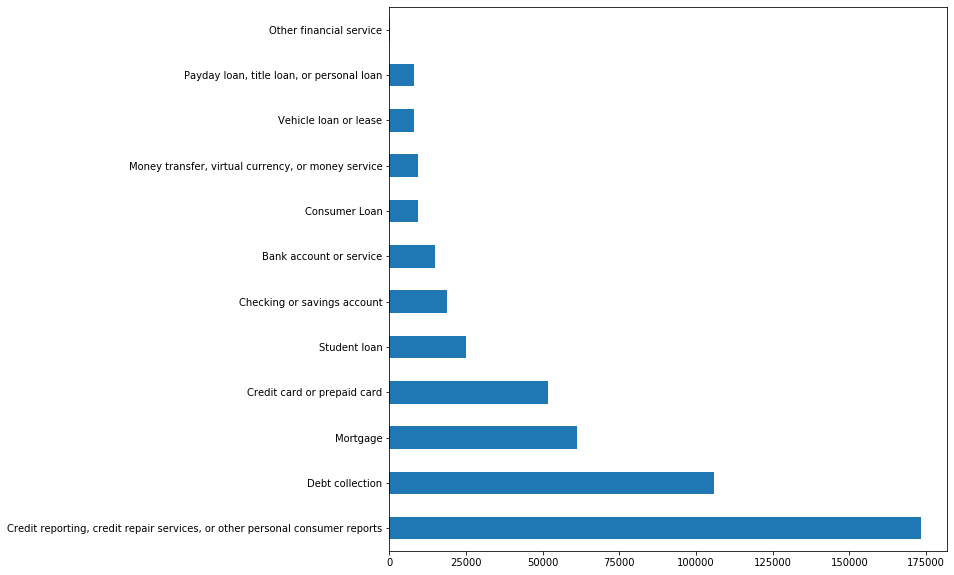

In [6]:
data["Product"].replace(to_replace="Virtual currency",value="Money transfer, virtual currency, or money service",inplace=True)
data["Product"].replace(to_replace="Money transfers",value="Money transfer, virtual currency, or money service",inplace=True)

data["Product"].replace(to_replace="Payday loan",value="Payday loan, title loan, or personal loan",inplace=True)
data["Product"].replace(to_replace="Prepaid card",value="Credit card or prepaid card",inplace=True)
data["Product"].replace(to_replace="Credit card",value="Credit card or prepaid card",inplace=True)

data["Product"].replace(to_replace="Credit reporting",value="Credit reporting, credit repair services, or other personal consumer reports",inplace=True)

plt.figure(figsize=(10,10))
data["Product"].value_counts().plot(kind="barh")

# Unnecessary columns

In [7]:
print(data.info())
data.isnull().sum(axis=0) # over alle kolommen heen
#data=data.drop(columns=["Consumer disputed?"])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 485701 entries, 0 to 485700
Data columns (total 28 columns):
Date received                       485701 non-null object
Product                             485701 non-null object
Sub-product                         485701 non-null object
Issue                               485701 non-null object
Sub-issue                           485701 non-null object
Consumer complaint narrative        485701 non-null object
Company public response             485701 non-null object
Company                             485701 non-null object
State                               485701 non-null object
ZIP code                            485701 non-null object
Tags                                485701 non-null object
Consumer consent provided?          485701 non-null object
Submitted via                       485701 non-null object
Date sent to company                485701 non-null object
Company response to consumer        485701 non-null object
Time

Date received                            0
Product                                  0
Sub-product                              0
Issue                                    0
Sub-issue                                0
Consumer complaint narrative             0
Company public response                  0
Company                                  0
State                                    0
ZIP code                                 0
Tags                                     0
Consumer consent provided?               0
Submitted via                            0
Date sent to company                     0
Company response to consumer             0
Timely response?                         0
Consumer disputed?                  321634
Complaint ID                             0
num_Product                              0
num_Sub-product                          0
num_Issue                                0
num_Sub-issue                            0
num_Company                              0
num_State  

Eerste stap : date received,complaint id, consumer disputed?, timely response?, date sent to company, consumer consent, submitted via,state en zip code,tags, Company public response,Company response to consumer weg

We houden over: product,subproduct,issue,subissue,consumer complaint narrative,company

Volgende stap state en zip code, (tags?) meepakken

In [8]:
data["Company"].unique()

array(['Experian Information Solutions Inc.',
       'Ideal Collection Services, Inc.',
       'ONEMAIN FINANCIAL HOLDINGS, LLC.', ..., 'Homes By Hunt LLC',
       'Maxitransfers Corporation', 'Reliable Auto Finance, Inc.'],
      dtype=object)

# Text Processing

In [19]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
subdata = data[["Complaint ID","Consumer complaint narrative","Product","Issue"]]

count_vect = CountVectorizer(
    stop_words="english",
    ngram_range=(1,2),
    min_df=0.04,
    max_df=0.7
)

X_train_counts = count_vect.fit_transform(subdata["Consumer complaint narrative"])
feature_names=count_vect.get_feature_names()

In [20]:
tf_transformer = TfidfTransformer()
X_train_tf = tf_transformer.fit_transform(X_train_counts)

In [21]:
index=0
print(subdata.at[index, "Consumer complaint narrative"])
print(subdata.at[index, "Product"])
print(subdata.at[index, "Issue"])



features = X_train_tf[index]
print(X_train_tf[index])

terms = pd.DataFrame(features.T.todense(), index=feature_names, columns=["tfidf"])
terms.sort_values(by=["tfidf"],ascending=False).head(n=10)

I have complained many times that the credit reporting by Experian is inaccurate and they always just say wait awhile, it will be fixed later and yet it never is. They are incapable of providing accurate information and do not take responsibility for their errors. This is a fake service, designed to serve only their needs and not the consumer 's needs. I can not find any way to cancel and when I mention it on the phone I am immediately disconnected. 
I want to be a part of the class action lawsuit against them since they are responsible for reducing my credit rating, releasing my personal information and my fraud complaints have multiplied over the last 2-3 years. I have spoken to many ineffectual and uncaring agents on their phone support lines and am just tired of paying them to degrade my credit for random incorrect reasons ( like I paid a utility bill with another bank account ) and not raising it for legitimate things like paying off thousands of dollars of debt, getting 3 new cre

,tfidf
credit,0.374719
just,0.359701
paying,0.285889
new,0.254705
like,0.246871
phone,0.218505
information,0.175576
action,0.162010
experian,0.161356
inaccurate,0.158568


Now we assign the tfidf score of the words per narrative to a dataframe which contains some other columns like Productnumber, issuenumber, etc.

In [22]:
dataset = []
for i in range(0, subdata.shape[0]):
    features = X_train_tf[i]
    terms = pd.DataFrame(features.todense(), columns=feature_names)
    terms = terms.assign(num_Product=data["num_Product"][i])
    terms = terms.assign(num_Sub_product=data["num_Sub-product"][i])
    terms = terms.assign(num_Issue=data["num_Issue"][i])
    terms = terms.assign(num_Sub_issue=data["num_Sub-issue"][i])
    terms = terms.assign(num_Company=data["num_Company"][i])
    terms = terms.assign(num_State=data["num_State"][i])
    terms = terms.assign(num_Submitted_via=data["num_Submitted via"][i])
    terms = terms.assign(num_Company_response_to_consumer=data["num_Company response to consumer"][i])
    terms = terms.assign(num_Product_Issue=data["num_Product_Issue"][i])
    dataset.append(terms)
result = pd.concat(dataset).reset_index(drop=True)
result

,00,00 xxxx,10,15,2018,30,30 days,able,account,account xxxx,...,years,num_Product,num_Sub_product,num_Issue,num_Sub_issue,num_Company,num_State,num_Submitted_via,num_Company_response_to_consumer,num_Product_Issue
0,0.086486,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.072140,0.000000,...,0.116779,6,15,45,127,1488,8,0,1,90
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.275841,0.000000,...,0.000000,7,33,56,9,2052,13,0,1,117
2,0.127542,0.000000,0.234821,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.344429,7,33,14,60,2948,13,0,1,113
3,0.000000,0.000000,0.000000,0.000000,0.207171,0.000000,0.000000,0.000000,0.093108,0.000000,...,0.000000,7,51,14,61,1337,57,0,1,113
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.058645,0.000000,...,0.047467,6,15,70,170,953,47,0,1,97
5,0.000000,0.000000,0.197027,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.144497,7,45,14,58,1331,15,0,3,113
6,0.320636,0.422181,0.084333,0.000000,0.000000,0.074480,0.000000,0.000000,0.000000,0.000000,...,0.000000,6,15,112,189,1386,31,0,1,101
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.055919,0.000000,...,0.000000,6,15,73,92,1488,17,0,3,98
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.014920,0.029170,...,0.000000,6,15,73,92,1488,13,0,3,98
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.071945,0.000000,...,0.000000,13,35,122,110,594,21,0,1,186


In [23]:
from sklearn.model_selection import train_test_split
y = result["num_Product_Issue"].values
x = result.drop(['num_Product_Issue'], axis = 1)
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=0)
print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))

388560
97141
388560
97141


# Manu
num_Product_Issue als target en enkel tfidfs overhouden
<br>
num_Product_Issue als target en product en issue droppen

# Robbe
product als target
<br>
issue als target